In [56]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import re
import time
from selenium.webdriver.common.by import By
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import sklearn as sk
sk.__version__



'0.24.1'

In [1]:
keyword = '세탁기'
keys = []
page_no = 1
columns = ['title', 'link', 'image', 'price', 'maker', 'category1', 'category2']
reviews_lists = []

with open('C:/Users/TECH2_07/Final_Project/bert_project/main/API_KEY.txt', 'r') as key:
    for line in key.readlines():
        text = line.strip()
        if text != '':
            keys.append(text.split(':')[1])

headers = {
    'X-Naver-Client-Id' : keys[0],
    'X-Naver-Client-Secret' : keys[1],
}

url = f'https://openapi.naver.com/v1/search/shop?&query={keyword}'
time.sleep(5.5)
text = requests.get(url, headers=headers)
# driver = webdriver.Chrome()
line = text.json()

reviews = []


for item in line['items']:
    page_no = 1
    
    time.sleep(7.7)
#     item_list.append([item['title'], item['link'], item['image'], item['lprice'], item['maker'], item['category3'], item['category4']])    
    data = requests.get(item['link'])
    soup = BeautifulSoup(data.text)
    
    text = soup.select_one('#wrap > div.product_bridge_product__n_89z > a:nth-child(5)')
    time.sleep(5.5)
    
    driver = webdriver.Chrome()
    driver.get('https://search.shopping.naver.com/catalog/21225654919?NaPm=ct%3Dlgu6spo0%7Cci%3D003949e55b1d3ab8955a8d80f2e6c80d637d8cd4%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3Db4650dcdee991cb7ccbda4393e2a2097dd2d16c9')
    time.sleep(3)
    
    page_no = 1
    
    for _ in range(5):
        if page_no == 11:
            driver.find_element(By.CSS_SELECTOR, '#section_review > div.pagination_pagination__JW7zT > a.pagination_next__3_3ip').click()
            page_no = 2
            
        time.sleep(3.8)
        driver.find_element('xpath', f'//*[@id="section_review"]/div[3]/a[{page_no}]').click()
        
        time.sleep(4.8)
        response = driver.find_elements('xpath', '//*[@id="section_review"]/ul/li/div[2]/div[1]/p')
        
        for review in response:
            reviews.append(review.text)
        
        page_no += 1
    break


KeyboardInterrupt: 

In [47]:
# df = pd.DataFrame(reviews, columns=['comments'])
df = pd.read_csv('./comment.csv', encoding='utf-8', engine='python')

In [48]:
df['comments'][0]

'예전 엘지세탁기 15 년간 써다가 누전 발생해서 부품이 없어서 수리 못하다가 급하게 온라인에서 구입했는데 설치가 2ㅡ3주 걸린다길래 여름철에 땀 많이 흘려서 몇번이나 갈아입어야하고 하루만 세탁안해도 빨랫감이 산더미처럼 쌓이는데 손 빨래 하다간 골병들것 같고 불편함과 어려움이 너무 가중될것 같아서 이리저리 알아보다가 다행이 하이마트 온라인몰에서 바로배송되는 세탁기가 있길래 여럿제품중에 이제품을 선택하게 됐습니다. 예전 세탁기 10 키로 짜리이고 이번 구입제품 12키로 짜리 인데도 외관 스펙은 더 작아습니다 시험삼아 세탁을 해본결과 전에세탁기는 탈수 시킬때 비행기 이륙할때 나는 굉음이 나고 했는데 이제품은 아주 조용해서 좋아습니다 그리고 소비 전력도 300 와트라서 완전 저 전력이라 습니다 우리 셋 식구인데 충분할것 같애요 혹시나 대형이불이나 담요 자주 세탁 하시는 분은 이보다 더큰제품이 맞을듯 하고요 저희는 이불세탁을 거의 안하다 보니깐 이 정도로도 충분 할것 같습니다 주문후 그 담날 바로 배송해서 설치했습니다 세탁도 나름 깨끗이 되는같고요'

In [53]:
lists = [comment for comment in df['comments']]
lists


['예전 엘지세탁기 15 년간 써다가 누전 발생해서 부품이 없어서 수리 못하다가 급하게 온라인에서 구입했는데 설치가 2ㅡ3주 걸린다길래 여름철에 땀 많이 흘려서 몇번이나 갈아입어야하고 하루만 세탁안해도 빨랫감이 산더미처럼 쌓이는데 손 빨래 하다간 골병들것 같고 불편함과 어려움이 너무 가중될것 같아서 이리저리 알아보다가 다행이 하이마트 온라인몰에서 바로배송되는 세탁기가 있길래 여럿제품중에 이제품을 선택하게 됐습니다. 예전 세탁기 10 키로 짜리이고 이번 구입제품 12키로 짜리 인데도 외관 스펙은 더 작아습니다 시험삼아 세탁을 해본결과 전에세탁기는 탈수 시킬때 비행기 이륙할때 나는 굉음이 나고 했는데 이제품은 아주 조용해서 좋아습니다 그리고 소비 전력도 300 와트라서 완전 저 전력이라 습니다 우리 셋 식구인데 충분할것 같애요 혹시나 대형이불이나 담요 자주 세탁 하시는 분은 이보다 더큰제품이 맞을듯 하고요 저희는 이불세탁을 거의 안하다 보니깐 이 정도로도 충분 할것 같습니다 주문후 그 담날 바로 배송해서 설치했습니다 세탁도 나름 깨끗이 되는같고요',
 '일단 설치기사님 너무 친절하셔서 기분이 좋았습니다.\n간혹 불친절한 기사님 이야기를 보아서 걱정을 많이 해서.. 그리고 예약한 시간에 정확할 정도로 맞게 와주셨습니다.\n문이 좁아 안들어갈까 걱정했는데 (폴딩도어 가운데 손잡이 부분이 60cm 살짝 넘더라구요)\n제가 확인 했을 때는 어디 스크레치 난 곳 없이 잘 들어갔던 것 같습니다.\n세탁기는 밤에도 돌릴 수 있을 정도로 조용한건 아니지만 낮에 쓰는데 무리없고, 그렇다고 그렇게 큰 정도도 아닌 것 같아 저는 괜찮은 것 같아요.\n저렴한 세탁기를 구입하려고 알아본거라, 성능을 딱히 기대하진 않아서.. ㅎㅎ\n\n대신, 세제 넣는 부분이 조금 불편했습니다.\n가루세제 넣는 부분은 뒤에 뚫려 있어서 잘못하면 아래로(세탁물) 쏟아져요. 세탁기가 작다보니 현재 큰통의 섬유유연제를 쓰고 있는데 그래서 자칫하면 섬유유연제가 많이 쏟아져 버리네요.\n이부분은 제가 주의하며 사

In [55]:
def tokenize_and_stemming(sentence, tokenizer):
    sentence = re.sub("[^\s0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣]", "", sentence) 
    stopwords = ['하다']
    raw_pos_tagged = tokenizer.pos(sentence, stem=True) # POS Tagging with stemming
    sentence_tokenized = []
    for token, pos in raw_pos_tagged:
        if (len(token) != 1) & (pos in ["Noun", "VerbPrefix", "Verb", "Adverb", "Adjective", "Conjunction", "KoreanParticle"]) & (raw_pos_tagged not in stopwords):
            sentence_tokenized.append(token)  
    return sentence_tokenized

okt = Okt()

df['comments'] = df['comments'].apply(lambda x : tokenize_and_stemming(x, okt))


vector = TfidfVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
# print(vector.fit_transform(tokens).toarray())
# vector.fit_transform(df['comments'][0])


In [57]:
vector = TfidfVectorizer()
# kor_bow = vector.transform(df['comments'][1])

bow_vect = vector.fit_transform(df['comments'][0])
word_list = vector.get_feature_names() # 어떤 단어들이 들어가있는지 확인
count_list = bow_vect.toarray().sum(axis=0) # 인덱스순으로 몇개의 단어가 있는지
word_count_dict = dict(zip(word_list, count_list)) # word, count를 key value로 묶는 것

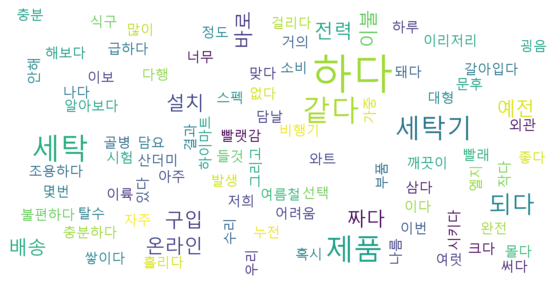

In [58]:
font_path = r'C:/Windows/Fonts/malgun.ttf'


wc = WordCloud(font_path=font_path, background_color='white', max_font_size=30, scale=7).generate_from_frequencies(word_count_dict)
plt.figure(figsize=(10, 5))
# wc.recolor(color_func=make_colors, random_state=True)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [ ]:
font_path = r'C:/Windows/Fonts/malgun.ttf'



wc = WordCloud(font_path=font_path, background_color='white', stopwords=['개소리', '존나', '개', '진짜', '정신'], mask=youtube_mask,
           max_font_size=30, scale=7, colormap=color[count]).generate(string)
plt.figure(figsize=(10, 5))
# wc.recolor(color_func=make_colors, random_state=True)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()
del string
wc.to_file(filename=f"침착맨_{video_on_comments_like_sum[count]}.png")
count += 1
